In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import gudhi as gd
from itertools import combinations

In [2]:
# data = torch.load("data/1000tsp20.pkl")
# data = data['x']
# visualize(data[0].numpy(), "data[0]")

In [127]:
def feature_matrix(points, simplex_tree):
    # features = points.T
    features = distance_matrix(points, points) 
    for simplex, filtration in simplex_tree.get_filtration():
        if len(simplex) > 2:
            feat = [filtration if i in simplex else 0 for i in range(n_points)]
            features = np.vstack([features, feat])
    return features

# n_points = 6
# points = np.random.rand(n_points, 2) 

# eps = 0.3
# max_dim = 3
# rips_complex = gd.RipsComplex(points=points, max_edge_length=eps)
# simplex_tree = rips_complex.create_simplex_tree(max_dimension=max_dim)

# np.set_printoptions(formatter={'float': '{: 0.2f}'.format})
# print(feature_matrix(points, simplex_tree))

In [152]:
def plot_simplex_hd(vertices, ax):
    for simplex in combinations(vertices, 3):
        simplex = list(simplex)
        pts = points[simplex].T
        ax.fill(pts[0], pts[1], color='b', alpha=0.1)

def plot_simplex(simplex, ax):
    if len(simplex) == 2:
        ax.plot(points[simplex, 0], points[simplex, 1], 'b-', linewidth=0.5)
    elif len(simplex) > 2:
        plot_simplex_hd(simplex, ax)

In [168]:
n_points = 12
points = np.random.rand(n_points, 2) 

In [169]:
eps = 0.4
max_dim = 3

rips_complex = gd.RipsComplex(points=points, max_edge_length=eps)
simplex_tree = rips_complex.create_simplex_tree(max_dimension=max_dim)
features = feature_matrix(points, simplex_tree)

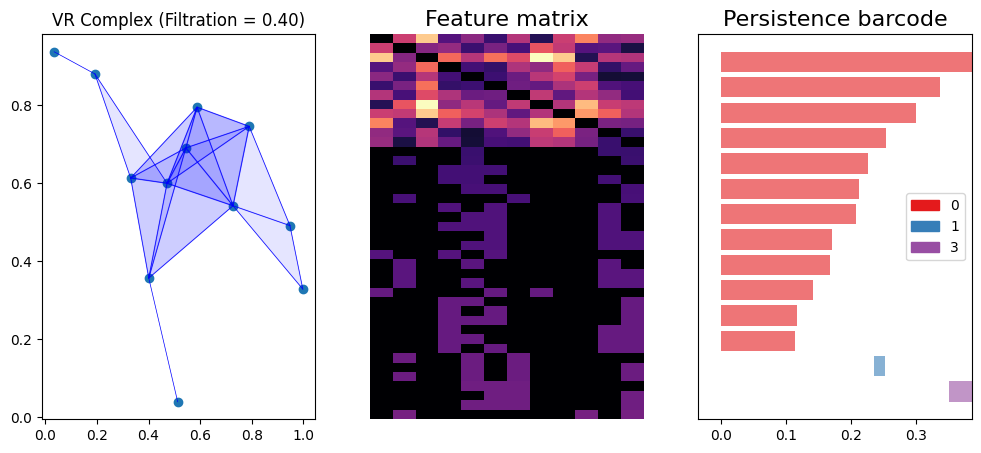

In [170]:
fig, ax = plt.subplots(1, 3, figsize=(12, 5))

ax[0].scatter(points[:, 0], points[:, 1], label='Data Points')
ax[0].set_title(f'VR Complex (Filtration = {eps:.2f})', fontsize=12)
for simplex, _ in simplex_tree.get_skeleton(2):
    plot_simplex(simplex, ax[0])

ax[1].imshow(features, aspect='auto', cmap='magma')
ax[1].set_axis_off()
ax[1].set_title('Feature matrix', fontsize=16)
        
diag = simplex_tree.persistence(min_persistence=0.0, persistence_dim_max=max_dim)
gd.plot_persistence_barcode(diag, axes=ax[2])  

plt.show()

In [163]:
ass = []
bss = []

for simplex, _ in simplex_tree.get_skeleton(3):
    if len(simplex) <= 3: 
        ass.append(simplex)

for simplex, _ in simplex_tree.get_skeleton(2):
    bss.append(simplex)

ass == bss

True

In [142]:
lifetimes = []
for bar in diag:
    if bar[0] > 0:
        lifetimes.append(bar[1])
lifetimes[]

[(0.35053702596308456, 0.3905954006320287)]

In [143]:
candidates = []
for simplex, filtration in simplex_tree.get_filtration():
    if len(simplex) > 2:
        for life in lifetimes:
            if filtration >= life[0] and filtration <= life[1]:
                candidates.append([simplex, filtration])

In [145]:
candidates

[[[3, 8, 9], 0.35648481504885915],
 [[1, 2, 8], 0.3593311460629531],
 [[1, 8, 9], 0.3593311460629531],
 [[1, 2, 8, 9], 0.3593311460629531],
 [[6, 8, 10], 0.3663188601294023],
 [[2, 3, 8], 0.37233077580927043],
 [[2, 3, 9], 0.37233077580927043],
 [[2, 3, 8, 9], 0.37233077580927043],
 [[6, 7, 8], 0.37948022640451184],
 [[6, 8, 11], 0.38849010561384345],
 [[7, 8, 11], 0.38849010561384345],
 [[6, 7, 8, 11], 0.38849010561384345],
 [[0, 3, 10], 0.3905954006320287],
 [[3, 8, 10], 0.3905954006320287]]

In [139]:
fmt = '%s -> %.2f'
for filtered_value in simplex_tree.get_filtration():
    print(fmt % tuple(filtered_value))

[0] -> 0.00
[1] -> 0.00
[2] -> 0.00
[3] -> 0.00
[4] -> 0.00
[5] -> 0.00
[6] -> 0.00
[7] -> 0.00
[8] -> 0.00
[9] -> 0.00
[10] -> 0.00
[11] -> 0.00
[7, 11] -> 0.02
[2, 9] -> 0.09
[4, 5] -> 0.15
[1, 2] -> 0.17
[1, 9] -> 0.24
[1, 2, 9] -> 0.24
[2, 8] -> 0.24
[5, 11] -> 0.27
[6, 10] -> 0.27
[8, 9] -> 0.28
[2, 8, 9] -> 0.28
[5, 7] -> 0.28
[5, 7, 11] -> 0.28
[0, 3] -> 0.29
[3, 9] -> 0.31
[6, 7] -> 0.32
[0, 10] -> 0.33
[6, 11] -> 0.34
[6, 7, 11] -> 0.34
[6, 8] -> 0.35
[3, 8] -> 0.36
[3, 8, 9] -> 0.36
[1, 8] -> 0.36
[1, 2, 8] -> 0.36
[1, 8, 9] -> 0.36
[1, 2, 8, 9] -> 0.36
[8, 10] -> 0.37
[6, 8, 10] -> 0.37
[2, 3] -> 0.37
[2, 3, 8] -> 0.37
[2, 3, 9] -> 0.37
[2, 3, 8, 9] -> 0.37
[7, 8] -> 0.38
[6, 7, 8] -> 0.38
[8, 11] -> 0.39
[6, 8, 11] -> 0.39
[7, 8, 11] -> 0.39
[6, 7, 8, 11] -> 0.39
[3, 10] -> 0.39
[0, 3, 10] -> 0.39
[3, 8, 10] -> 0.39


In [172]:
# import matplotlib.pyplot as plt
# from itertools import combinations
# import gudhi as gd

# def plot_rips_complex_for_different_edge_lengths(points, edge_lengths):
#     n = len(edge_lengths)
#     cols = 3
#     rows = n // cols + (n % cols > 0) 
    
#     fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
#     axes = axes.flatten() 

#     for idx, max_edge_length in enumerate(edge_lengths):
#         rips_complex = gd.RipsComplex(points=points, max_edge_length=max_edge_length)
#         simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
        
#         ax = axes[idx]  
#         ax.scatter(points[:, 0], points[:, 1], label='Data Points')
        
#         def plot_simplex(vertices, ax):
#             for simplex in combinations(vertices, 2):
#                 ax.plot(points[list(simplex), 0], points[list(simplex), 1], 'r-', linewidth=0.7)
                
#         for simplex, _ in simplex_tree.get_skeleton(2):
#             if len(simplex) == 2:
#                 ax.plot(points[simplex, 0], points[simplex, 1], 'b-', linewidth=0.4)
#             elif len(simplex) > 2:
#                 plot_simplex(simplex, ax)
        
#         ax.set_title(f'Max Edge Length = {max_edge_length}')
        
#     for j in range(idx + 1, len(axes)): 
#         axes[j].axis('off')
#     plt.tight_layout()
#     plt.show()

# edge_lengths = [0.12, 0.16, 0.2]
# plot_rips_complex_for_different_edge_lengths(points, edge_lengths)